In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('our-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACTATAATGCGTGGGCCGACCTCGGAATGCGGTCTCCATGCGCGTT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAAGCAGTTAGGGCCTACCAAATCGGTTGGTCCTCCTTGTATC...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,ATGTTACGTCCCCCGCTATGGCACTTCTTGATCCCCACCTTCATGA...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGACGCCCGGAGCGACCCATTGGCGTAAGCGAGTGTCAC...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGAATGTAACTCATGGTTACTTGTCGCTGAGGGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GTATGTTTGGAAAGTGGCAGCCTTTCCCACCCAGGGTATATGGTCC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAATTTGGAACGTGTTCGTCCGCCAATATGGTTGCTTCTAGTATAA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGAACAACCGGAAGGGTGCATGGGCACCGCATATTCCC...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGGCTGGTATAATGAAACGACAACCTGTCTTTG...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 51214.00it/s]


[555, 1337, 1931, 2405, 2794, 3150, 3422, 3673, 3867, 4076, 4270, 4352, 4567, 4531, 4676, 4881, 4962, 4974, 4947, 5084, 5226, 5231, 5223, 5264, 5364, 5394, 5480, 5475, 5489, 5599, 5512, 5588, 5627, 5514, 5593, 5660, 5622, 5707, 5710, 5807, 5685, 5758, 5760, 5651, 5863, 5814, 5749, 5801, 5849, 5720, 5760, 5759, 5717, 5823, 5753, 5666, 5710, 5731, 5723, 5710, 5736, 5706, 5649, 5769, 5699, 5712, 5707, 5605, 5703, 5613, 5646, 5583, 5559, 5583, 5558, 5496, 5399, 5537, 5388, 5386, 5295, 5405, 5256, 5266, 5303, 5161, 5132, 5199, 5103, 5041, 4974, 4981, 4792, 4733, 4539, 4553, 4503, 4276, 4220, 3974, 3848, 3686, 3403, 3172, 2816, 2423, 1983, 1502, 780, 192]


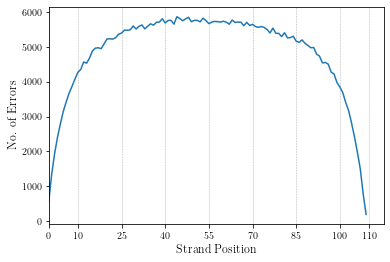

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-sab-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:11<00:00, 835.11it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


TAAC ->  6
TATC ->  6
CTGC ->  6
 -> CAAT 6
CAA -> G 6
AAGT ->  6
 -> TTGTT 6
 -> CTTC 6
ATGT ->  6
 -> CTCG 6
 -> CGAT 6
 -> GTTTT 6
TCAA ->  6
 -> ATCA 6
CACT ->  6
 -> GTAG 6
C -> TGTT 6
 -> CTGC 6
GCG -> T 6
GGAA ->  6
GC -> AT 6
AACC ->  6
 -> CGTA 6
 -> ATGT 6
 -> TAAT 6
 -> CGCC 6
GCAA ->  6
CCA -> T 6
GCAC ->  6
 -> GTGA 6
 -> TTTTTTT 6
ATG -> C 6
 -> GGGGT 6
A -> GGTT 6
A -> CCTC 6
GA -> TTT 6
G -> TTTTT 6
TCGC ->  6
 -> AGCC 6
 -> CCCT 6
AGCG ->  6
A -> GGGGG 6
A -> GGGG 6
ACAT ->  6
G -> TTA 6
AGC -> T 6
G -> TAT 6
AGAG ->  6
TGTA ->  6
T -> CCC 6
GTGA ->  6
CGTA ->  6
AG -> CC 6
CGTC ->  6
 -> ACCC 6
ACTA ->  6
CTA -> G 6
 -> TGGC 6
AGT -> C 6
GAA -> C 6
CAA -> T 6
ATAT ->  6
 -> AGTG 6
ATAC ->  6
 -> AAGG 6
 -> CACG 6
TA -> CG 6
AATC ->  6
TAA -> C 6
 -> CGTC 7
 -> AGAA 7
 -> ACCA 7
TT -> C 7
GC -> TA 7
CTC -> G 7
C -> TTTG 7
GCGA ->  7
 -> TATC 7
AAAC ->  7
GCGC ->  7
 -> CGGG 7
 -> CTTA 7
 -> CTTG 7
C -> TTTTT 7
CTTG ->  7
 -> GGGTT 7
CAAA ->  7
ACGG ->  7
AA -> CC 7
 ->

CA ->  @ 34 6
G -> C @ 101 6
A -> TT @ 30 6
 -> GG @ 6 6
 -> GGC @ 52 6
 -> A @ 61 6
C -> A @ 86 6
CA ->  @ 36 6
 -> TG @ 35 6
A -> GG @ 103 6
T -> A @ 68 6
CG ->  @ 18 6
CG ->  @ 15 6
 -> GAA @ 53 6
 -> TT @ 92 6
G -> A @ 9 6
T -> A @ 6 6
 -> GA @ 6 6
CG ->  @ 108 6
T -> A @ 7 6
CG ->  @ 106 6
 -> AT @ 101 6
 -> GG @ 50 6
C -> A @ 36 6
CG ->  @ 100 6
G -> A @ 91 6
T -> A @ 65 6
 -> AC @ 57 6
G -> A @ 97 6
 -> AT @ 13 6
AC -> T @ 18 6
 -> CC @ 99 6
A -> TT @ 33 6
 -> CG @ 57 6
C -> A @ 44 6
 -> GA @ 5 6
 -> TG @ 18 6
 -> GG @ 86 6
 -> TG @ 16 6
G -> C @ 74 6
G -> A @ 87 6
G -> C @ 78 6
 -> GA @ 51 6
 -> GG @ 96 6
G -> C @ 82 6
C -> A @ 63 6
C -> A @ 62 6
A -> TT @ 17 6
G -> C @ 92 6
G -> C @ 93 6
G -> C @ 98 6
G -> C @ 97 6
A -> CT @ 21 6
G -> C @ 81 6
T -> A @ 90 6
T -> A @ 9 6
C -> A @ 43 6
 -> GG @ 69 6
T -> A @ 78 6
A -> GC @ 4 6
 -> TG @ 32 6
 -> GG @ 78 6
G -> C @ 22 6
C -> A @ 78 6
C -> A @ 77 6
C -> A @ 75 6
C -> A @ 73 6
G -> C @ 33 6
 -> TG @ 24 6
T -> A @ 85 6
 -> TC @ 50 6


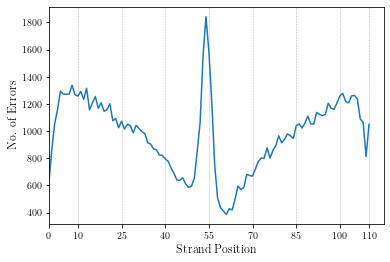

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-sab-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 79, 110, 103, 153, 123, 129, 146, 132, 113, 121, 116, 122, 121, 124, 108, 106, 100, 120, 114, 101, 97, 106, 116, 89, 76, 110, 95, 75, 71, 82, 93, 91, 93, 86, 67, 78, 84, 60, 79, 71, 70, 69, 46, 65, 49, 55, 52, 45, 45, 41, 38, 28, 79, 98, 86, 65, 28, 25, 21, 39, 21, 43, 44, 45, 50, 54, 54, 81, 70, 71, 62, 63, 82, 83, 83, 84, 79, 91, 89, 87, 94, 96, 92, 88, 91, 96, 115, 91, 115, 100, 110, 114, 106, 112, 96, 117, 114, 119, 124, 106, 130, 119, 121, 121, 126, 91, 106, 120, 125, 151]
[0, 72, 74, 83, 101, 90, 110, 96, 102, 86, 85, 88, 76, 94, 76, 79, 98, 88, 84, 81, 78, 79, 77, 87, 65, 55, 78, 80, 76, 78, 75, 79, 57, 59, 52, 66, 64, 68, 64, 66, 51, 43, 34, 42, 43, 43, 44, 33, 42, 37, 28, 38, 32, 53, 82, 87, 37, 22, 13, 14, 20, 26, 28, 24, 35, 41, 52, 51, 51, 46, 51, 61, 52, 64, 57, 57, 54, 59, 60, 76, 67, 71, 72, 61, 59, 68, 87, 67, 82, 84, 59, 54, 85, 83, 93, 89, 87, 90, 87, 86, 71, 98, 98, 85, 92, 83, 88, 91, 96, 103, 108]
[181, 98, 88, 86, 102, 100, 93, 96, 100, 70, 75, 99, 91, 73, 75,

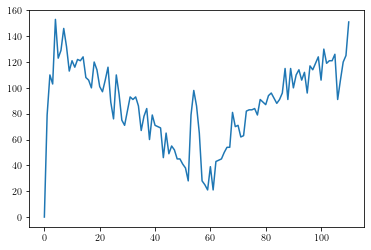

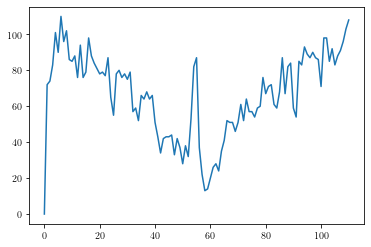

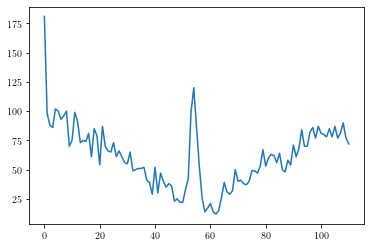

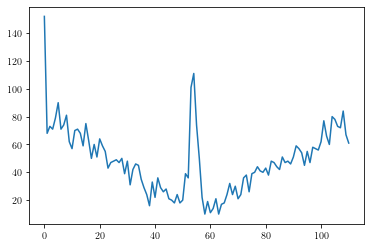

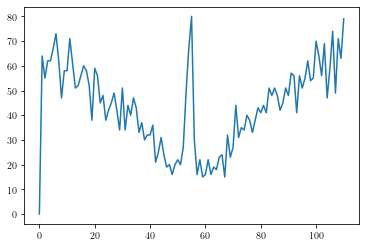

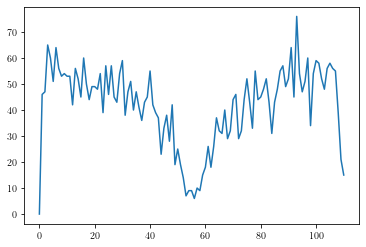

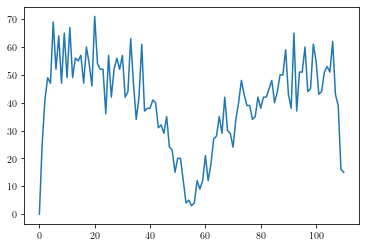

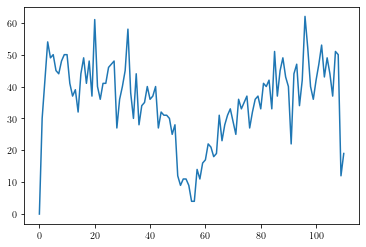

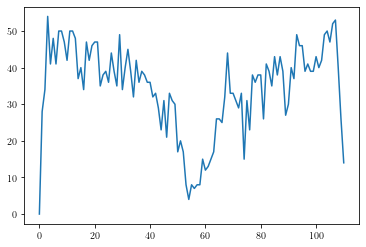

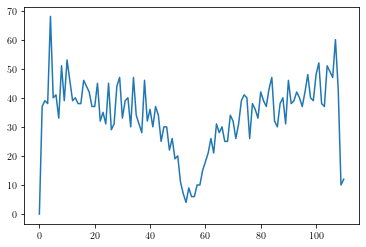

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)